In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# # I am going to add deep learnig methords as soon as I learn them ##
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn import tree  #for tree

from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression # logistic regresion 
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier # k nearst nebor

from sklearn.svm import SVC  # support vector machine

from sklearn.naive_bayes import GaussianNB # import naive biase
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv(r"fashion-mnist_train.csv")
dft = pd.read_csv(r'fashion-mnist_test.csv')

In [6]:
print("the shape of the traning set: {}\n".format(df.shape))
print("the shape of the traning set: {}".format(dft.shape))

the shape of the traning set: (10000, 785)

the shape of the traning set: (10000, 785)


In [7]:
df.label.unique()

array([0, 1, 2, 3, 8, 6, 5, 4, 7, 9], dtype=int64)

In [8]:
# checking for null values in the traing data set
df.isnull().any().sum()

0

In [9]:
# checking for null values in the test data set
dft.isnull().any().sum()

0

In [10]:
clothing = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullovers",
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'}
cloth_lable = ["T-shirt/top","Trouser","Pullovers",'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

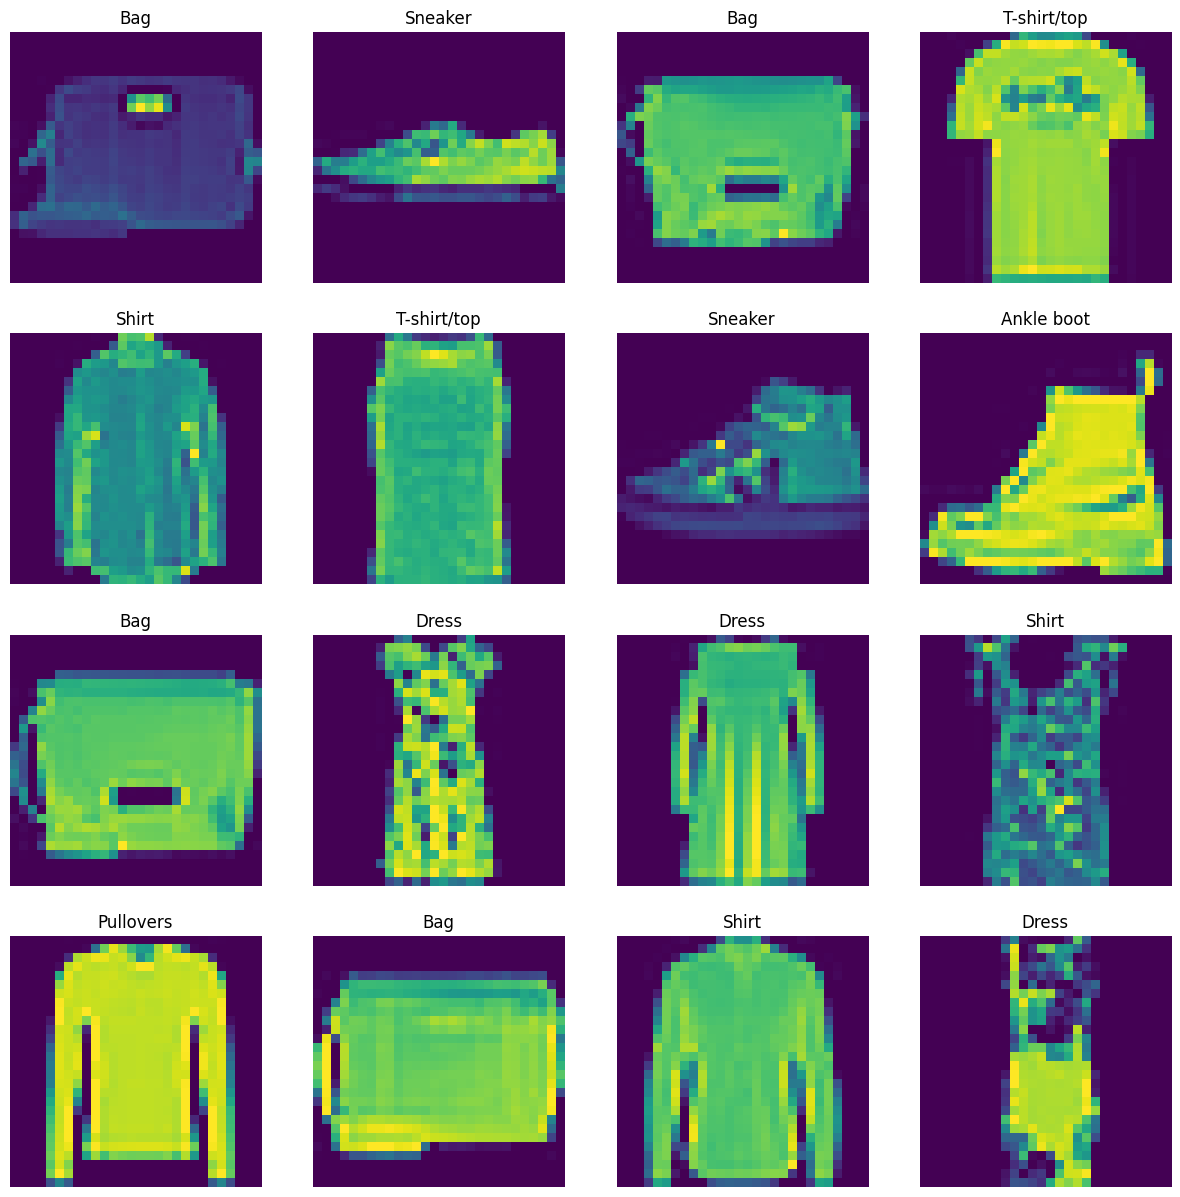

In [11]:
fig , axes = plt.subplots(4,4 , figsize = (15,15))

for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = df.drop("label", axis=1).values[index].reshape(28,28)
        cloths = df["label"][index]
        axe.imshow(img)
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [12]:
#  Postavljanje seed-a na vrednost 66 osigurava da se generisani slučajni brojevi reprodukuju
seed = 66
np.random.seed(seed)
 #train_test_split funkcija za podelu podataka na trening i test skup.
X = df.iloc[:,1:]
Y = df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

#Vrednosti piksela slika se normalizuju tako da su u opsegu [0, 1]. Ovo je važno jer mnogi algoritmi bolje rade sa vrednostima u ovom opsegu.
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
dft = dft.astype("float32")/255

# predecting
Xp = dft.iloc[:,1:]
Yp = dft.iloc[:,0]


In [13]:
# useing naive biase 
# Koristi se Naivni Bajesov klasifikator (GaussianNB) za treniranje modela na trening podacima.
model = GaussianNB()
model.fit(x_train, y_train.values.ravel())

y_pre = model.predict(x_test)

print("the accuracy_score : {}".format(accuracy_score(y_test, y_pre)))

the accuracy_score : 0.542


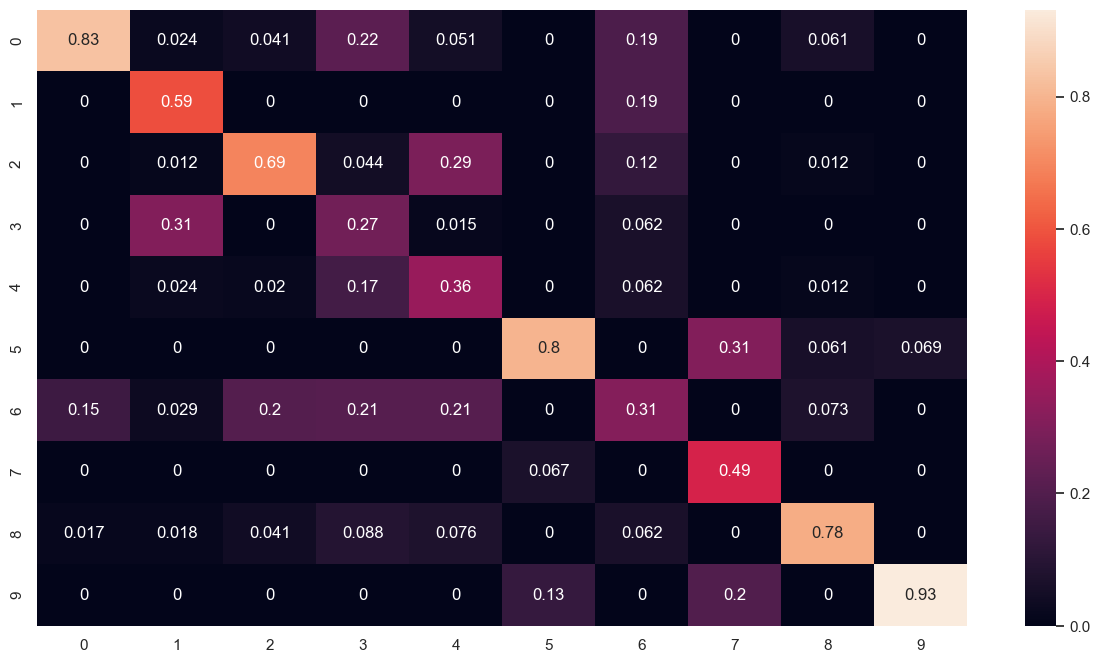

In [14]:
#Model se koristi za predviđanje klasa na test podacima, a zatim se meri tačnost modela pomoću accuracy_score i prikazuje se matrica konfuzije pomoću confusion_matrix.
#Matrica konfuzije pruža uvid u to koliko su tačne predikcije za svaku klasu u odnosu na stvarne vrednosti.
sns.set(rc = {'figure.figsize':(15,8)})# setting figure size

cfm = confusion_matrix(y_test, y_pre, normalize= 'pred')
sns.heatmap(cfm, annot = True)
plt.show()

In [15]:
# Prikazivanje stvarnih i predviđenih vrednosti za prvih N primera
N = 10
for i in range(N):
    print(f"Stvarno: {y_test.iloc[i]}, Predviđeno: {y_pre[i]}")


Stvarno: 6, Predviđeno: 2
Stvarno: 7, Predviđeno: 7
Stvarno: 8, Predviđeno: 8
Stvarno: 7, Predviđeno: 7
Stvarno: 5, Predviđeno: 9
Stvarno: 3, Predviđeno: 1
Stvarno: 1, Predviđeno: 1
Stvarno: 1, Predviđeno: 1
Stvarno: 7, Predviđeno: 7
Stvarno: 6, Predviđeno: 0


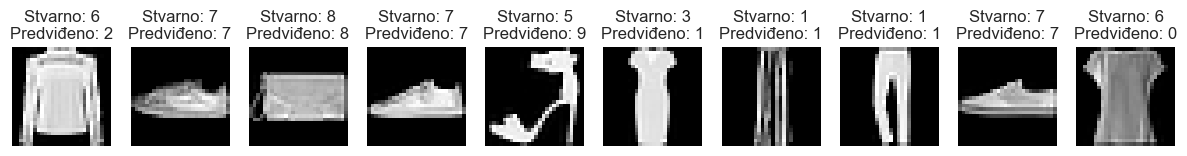

In [16]:
# Prikazivanje prvih N slika sa stvarnim i predviđenim klasama
N = 10
for i in range(N):
    plt.subplot(1, N, i + 1)
    plt.imshow(x_test.iloc[i].values.reshape((28, 28)), cmap='gray')
    plt.title(f"Stvarno: {y_test.iloc[i]}\nPredviđeno: {y_pre[i]}")
    plt.axis('off')
plt.show()


In [21]:
# Logistička Regresija
model = LogisticRegression(random_state=42, max_iter=100)
model.fit(x_train, y_train.values.ravel())

y_pre = model.predict(x_test)

# Ispisivanje stvarnih i predviđenih vrednosti za prvih N elemenata
N = 10
for i in range(N):
    print(f"Stvarno: {y_test.iloc[i]}, Predviđeno: {y_pre[i]}")

print("Tačnost modela: {}".format(accuracy_score(y_test, y_pre)))


Stvarno: 6, Predviđeno: 2
Stvarno: 7, Predviđeno: 7
Stvarno: 8, Predviđeno: 8
Stvarno: 7, Predviđeno: 7
Stvarno: 5, Predviđeno: 5
Stvarno: 3, Predviđeno: 3
Stvarno: 1, Predviđeno: 1
Stvarno: 1, Predviđeno: 1
Stvarno: 7, Predviđeno: 7
Stvarno: 6, Predviđeno: 0
Tačnost modela: 0.844


C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


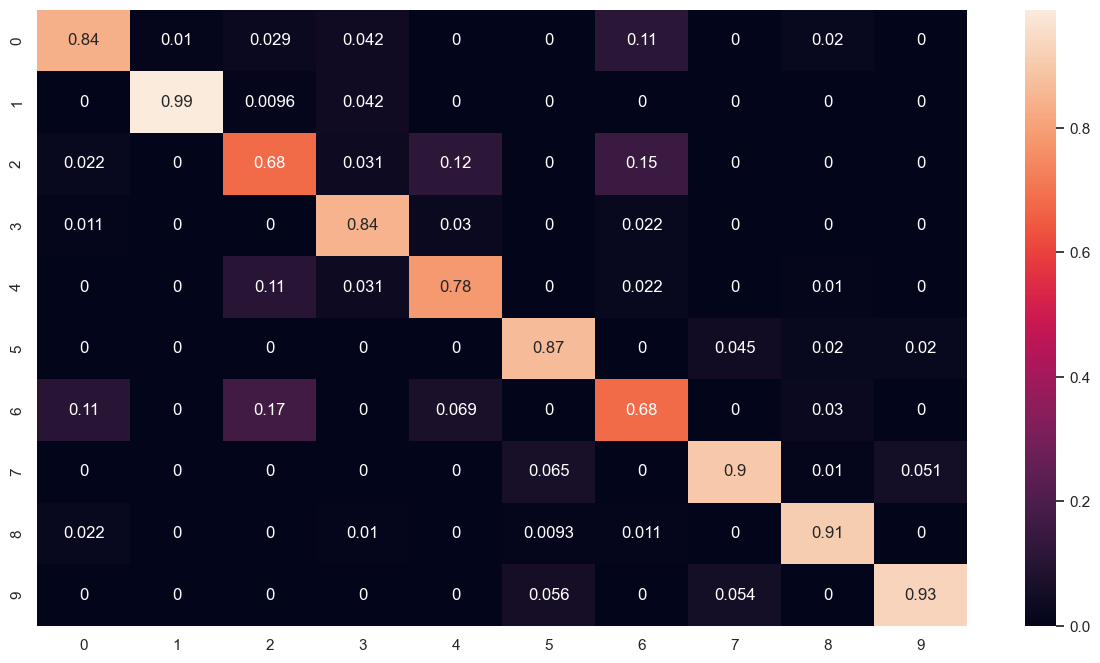

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})# setting figure size

cfm = confusion_matrix(y_test, y_pre, normalize= 'pred')
sns.heatmap(cfm, annot = True)
plt.show()

In [23]:
#Linearna regresija
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicijalizacija i treniranje modela
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

# Predviđanje na test skupu
y_pred = regression_model.predict(x_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Srednje kvadratna greška (MSE): {mse}")
print(f"R-squared vrednost: {r2}")


Srednje kvadratna greška (MSE): 2.4783391229487717
R-squared vrednost: 0.702111817192747


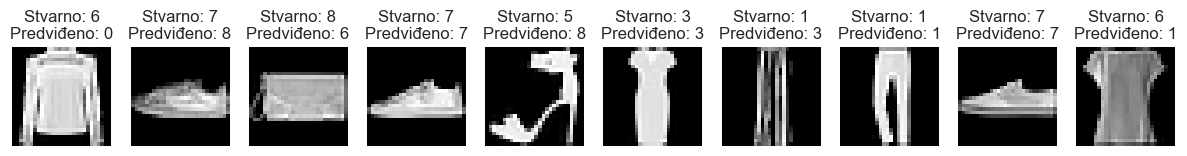

In [25]:
import matplotlib.pyplot as plt

# Prikazivanje prvih N primera sa stvarnim i zaokruženim predviđenim vrednostima
N = 10
for i in range(N):
    plt.subplot(1, N, i + 1)
    
    # Prikazivanje slike (pretpostavljamo da su slike dimenzija 28x28)
    plt.imshow(x_test.iloc[i].values.reshape((28, 28)), cmap='gray')
    
    # Zaokruživanje predviđenih vrednosti
    rounded_prediction = round(y_pred[i])
    
    # Dodavanje naslova sa stvarnim i zaokruženim predviđenim vrednostima
    plt.title(f"Stvarno: {y_test.iloc[i]}\nPredviđeno: {rounded_prediction}")
    
    # Isključivanje oznaka na osama radi čistijeg prikaza
    plt.axis('off')

# Prikazivanje dijagrama
plt.show()



In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inicijalizacija i treniranje modela (u ovom primeru, K=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

# Predviđanje na test skupu
y_pred_knn = knn_model.predict(x_test)

# Evaluacija modela
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print(f"Tačnost (Accuracy) KNN modela: {accuracy_knn}")
print("Izveštaj klasifikacije KNN modela:\n", classification_report_knn)


Tačnost (Accuracy) KNN modela: 0.818
Izveštaj klasifikacije KNN modela:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        98
           1       1.00      0.96      0.98       103
           2       0.69      0.75      0.72       102
           3       0.89      0.89      0.89        87
           4       0.76      0.68      0.72        96
           5       0.95      0.69      0.80       102
           6       0.62      0.59      0.61       100
           7       0.81      0.93      0.86       113
           8       0.96      0.98      0.97        96
           9       0.84      0.90      0.87       103

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



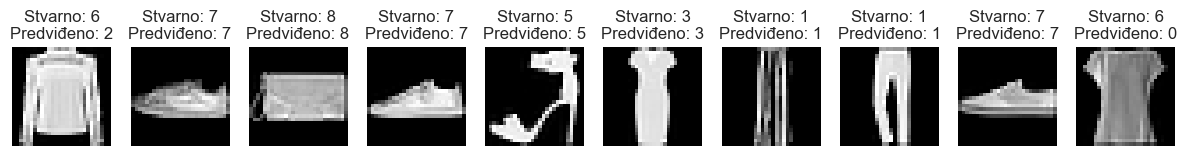

In [27]:
import matplotlib.pyplot as plt

# Prikazivanje prvih N primera sa stvarnim i predviđenim vrednostima za KNN model
N = 10
for i in range(N):
    plt.subplot(1, N, i + 1)
    
    # Prikazivanje slike (pretpostavljamo da su slike dimenzija 28x28)
    plt.imshow(x_test.iloc[i].values.reshape((28, 28)), cmap='gray')
    
    # Dodavanje naslova sa stvarnim i predviđenim vrednostima
    plt.title(f"Stvarno: {y_test.iloc[i]}\nPredviđeno: {y_pred_knn[i]}")
    
    # Isključivanje oznaka na osama radi čistijeg prikaza
    plt.axis('off')

# Prikazivanje dijagrama
plt.show()
